In [62]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [63]:
data = load_iris()
X, y = data.data, data.target

print(X.shape, y.shape)

(150, 4) (150,)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [65]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [66]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


# Hyperparameter tuning with TreeClassifier using GridSearchCV

In [67]:

from sklearn.model_selection import GridSearchCV

grid_params = {
  'max_depth': range(1, 10, 1),
  'min_samples_leaf': range(1, 20, 2),
  'min_samples_split': range(2, 20, 2),
  'criterion': ["entropy", "gini", "log_loss"]
}

grid_search = GridSearchCV(estimator=tree, param_grid=grid_params, cv=5, verbose=True)

In [68]:
grid_search.fit(X_train, y_train)

print("Best Accuracy: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits
Best Accuracy:  0.9428571428571428
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=1)


Visualizing the DecisionTree classifier's performance across different hyperparameter settings using GridSearchCV.

```python

/tmp/ipykernel_6290/1749058782.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


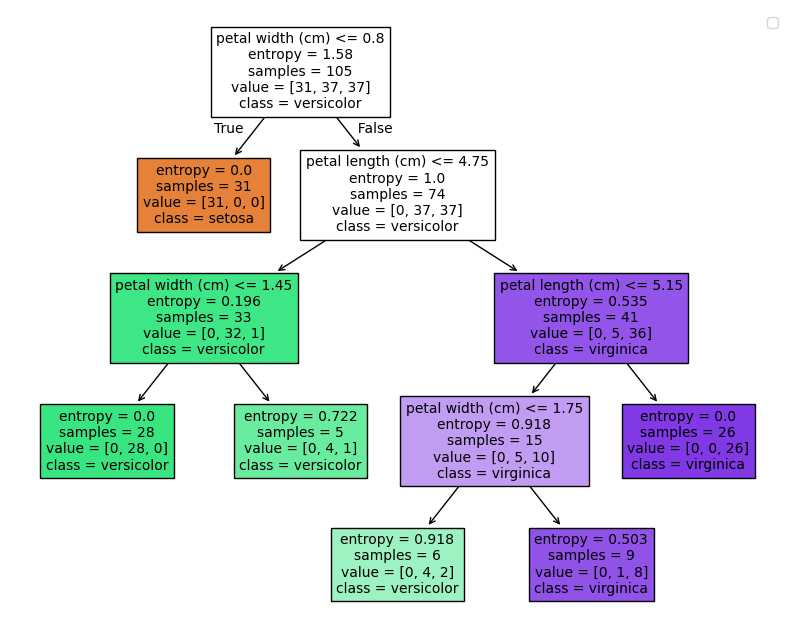

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree_clf = grid_search.best_estimator_

plt.figure(figsize=(10, 8))
plot_tree(
  tree_clf, 
  filled=True, 
  feature_names=data.feature_names, class_names=data.target_names
)
plt.show()